✅ Dataset loaded successfully!
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

🔍 Missing values before cleaning:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
c

/tmp/ipython-input-1222178402.py:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].mean(), inplace=True)
/tmp/ipython-input-1222178402.py:38: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

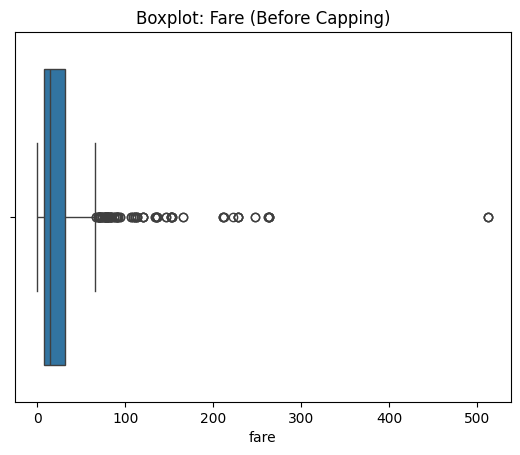


✅ Final cleaned dataset preview:
   survived  pclass  sex  age_norm  fare_norm  embarked  is_child
0         0       3    1 -0.592148   0.014500         1         0
1         1       1    0  0.638430   0.142567         2         0
2         1       3    0 -0.284503   0.015850         1         0
3         1       1    0  0.407697   0.106200         1         0
4         0       3    1  0.407697   0.016100         1         0


/tmp/ipython-input-1222178402.py:65: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['embarked'].replace("", "Unknown", inplace=True)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


💾 titanic_clean.csv saved and ready for download!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


✅ observations.md saved and ready for download!

🎯 Assignment completed successfully!


In [1]:
# ============================================
# TITANIC DATA PREPROCESSING & CLEANING (Colab)
# ============================================

# 🧰 Step 1: Install and import libraries
!pip install pandas numpy seaborn matplotlib --quiet

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

# ============================================
# 📂 Step 2: Load the dataset
# ============================================

# Option 1: Use built-in Titanic dataset (recommended for testing)
df = sns.load_dataset('titanic')

# Option 2: Uncomment below to upload Kaggle's train.csv manually
# uploaded = files.upload()
# df = pd.read_csv("train.csv")

print("✅ Dataset loaded successfully!")
print(df.head())

# ============================================
# 🧹 Part 1: Data Cleaning
# ============================================

# 1️⃣ Check missing values
print("\n🔍 Missing values before cleaning:")
print(df.isnull().sum())

# 2️⃣ Handle missing values
df['age'].fillna(df['age'].mean(), inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)
if 'cabin' in df.columns:
    df.drop(columns=['cabin'], inplace=True)

# 3️⃣ Detect and handle outliers (Fare)
sns.boxplot(x=df['fare'])
plt.title("Boxplot: Fare (Before Capping)")
plt.show()

# Cap Fare values above 500
df.loc[df['fare'] > 500, 'fare'] = 500

# 4️⃣ Normalize numerical columns
df['fare_norm'] = (df['fare'] - df['fare'].min()) / (df['fare'].max() - df['fare'].min())
df['age_norm'] = (df['age'] - df['age'].mean()) / df['age'].std()

# ============================================
# 🧪 Part 2: Feature Engineering
# ============================================

# 👶 Create is_child
df['is_child'] = np.where(df['age'] < 16, 1, 0)

# ⚧ Encode Sex
df['sex'] = df['sex'].map({'male': 1, 'female': 0})

# 🌍 Encode Embarked
df['embarked'].replace("", "Unknown", inplace=True)
embarked_map = {'S': 1, 'C': 2, 'Q': 3, 'Unknown': 0}
df['embarked'] = df['embarked'].map(embarked_map)

# ============================================
# 📉 Keep Only Required Columns
# ============================================
final_df = df[['survived', 'pclass', 'sex', 'age_norm', 'fare_norm', 'embarked', 'is_child']]
print("\n✅ Final cleaned dataset preview:")
print(final_df.head())

# ============================================
# 💾 Save Cleaned Dataset
# ============================================
final_df.to_csv('titanic_clean.csv', index=False)
files.download('titanic_clean.csv')
print("\n💾 titanic_clean.csv saved and ready for download!")

# ============================================
# 📝 Create Observations File
# ============================================
observations = f"""
# Titanic Data Preprocessing - Observations

## Missing Values
- Age: filled with mean ({df['age'].mean():.2f})
- Embarked: filled with mode ('{df['embarked'].mode()[0]}')
- Cabin: dropped due to many missing values

## Outliers
- Fare values above 500 capped at 500

## Normalization
- Fare_norm = (Fare - min) / (max - min)
- Age_norm = (Age - mean) / std

## Feature Engineering
- is_child = 1 if Age < 16 else 0
- sex encoded: male=1, female=0
- embarked encoded: S=1, C=2, Q=3, Unknown=0

## Final Dataset
- Columns: Survived, Pclass, Sex, Age_norm, Fare_norm, Embarked, is_child
- Shape: {final_df.shape[0]} rows × {final_df.shape[1]} columns
"""

with open("observations.md", "w") as f:
    f.write(observations)

files.download("observations.md")

print("\n✅ observations.md saved and ready for download!")
print("\n🎯 Assignment completed successfully!")

